In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [4]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [5]:
target = df.Survived
inputs= df.drop("Survived"  , axis=1)

In [6]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [8]:
dummies = pd.get_dummies(inputs.Sex)
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [9]:
inputs = pd.concat([inputs , dummies] , axis=1)
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [11]:
inputs.drop("Sex" , axis= 1 , inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0


In [12]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [13]:
inputs.Age.isna().sum()

177

In [29]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [30]:
inputs.Age.isna().sum()

0

In [49]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(inputs , target , test_size=0.2)

In [50]:
len(X_train) , len(X_test)

(712, 179)

In [57]:
from sklearn.naive_bayes import GaussianNB
modle = GaussianNB()

A Gaussian Naive Bayes algorithm is a special type of NB algorithm. It's specifically used when the features have continuous values. It's also assumed that all the features are following a gaussian distribution i.e, normal distribution.٢٠‏/٠٢‏/٢٠١٧


In [58]:
modle.fit(X_train , y_train)

GaussianNB()

In [59]:
modle.score(X_test,y_test)

0.7877094972067039

In [60]:
y_test[:10]

278    0
482    0
459    0
830    1
644    1
461    0
545    0
854    0
776    0
594    0
Name: Survived, dtype: int64

In [61]:
modle.predict(X_test[:10])

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [62]:
modle.predict_proba(X_test[:10])

array([[0.97699825, 0.02300175],
       [0.9875237 , 0.0124763 ],
       [0.98882227, 0.01117773],
       [0.03736141, 0.96263859],
       [0.01956623, 0.98043377],
       [0.98917535, 0.01082465],
       [0.86428917, 0.13571083],
       [0.02286288, 0.97713712],
       [0.98882227, 0.01117773],
       [0.9758331 , 0.0241669 ]])

In [97]:
#end

In [ ]:
# T

In [63]:
import seaborn as sn

<AxesSubplot: xlabel='Age', ylabel='Count'>

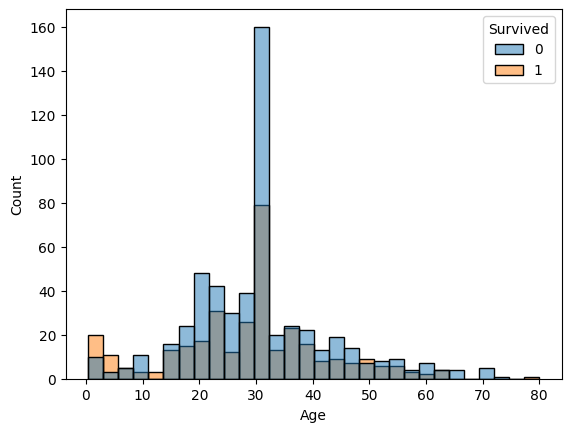

In [99]:
sn.histplot(data=df , x=inputs['Age'] , hue='Survived' )

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),  inputs, target,cv=3)


array([0.79124579, 0.8013468 , 0.77441077])

In [95]:
cross_val_score(GaussianNB(),  inputs, target,cv=3)


array([0.78114478, 0.79124579, 0.78451178])

In [96]:
cross_val_score(RandomForestClassifier(),  inputs, target,cv=3)


array([0.78114478, 0.84175084, 0.81144781])